# Final Project - Data Science/Spatial Analysis

## 1. Project Title

Optimal siting of electric vehicle chargers in Tokyo

## 2. Team members

Sohei Yamada (A59004030) <br>
Yuki Imura (A59011525)

## 3. Questions we addressed, why it is important (5pt)

<p>Our overarching question is to find where are the optimal points to locate electric vehicle (EV) chargers in Tokyo. Therefore, we will perform an analysis using geographic information and machine learning to answer the following three questions:</p>

<p><b>Question 1: Do existing electric vehicle (EV) chargers have sufficient coverage to promote EVs?</b><br>
Since EVs require frequent recharging, EV adoption may be delayed in areas with small coverage. We will use data on EV charger locations in Tokyo to analyze the geographical coverage.</p>

<p><b>Question 2: Are the existing EV chargers unevenly distributed among certain socioeconomic communities?</b><br>
We hypothesize that EV chargers may be unevenly distributed in higher-income neighborhoods because EVs and EV chargers are expensive. This geographic bias may increase the disproportionate disparity in environmental impacts and health risks by community because gasoline vehicles emit more carbon dioxide, PM2.5 and other toxins than EVs. We will use municipality-level Tokyo metropolitan census data and EV charger location data to determine the relationship between socioeconomic characteristics and EV charger location by municipality-level analysis.</p>

<p><b>Question 3:  Where are the optimal places to locate EV charge stations (Places where several chargers are installed so that many EVs can be charged at the same time)?</b><br>
EV chargers should be located near major roads, gas stations, and shopping centers to improve convenience for drivers, but should not be located where flooding or landslides are expected to avoid safety issues. EV chargers should also not be installed in places where chronic traffic congestion occurs to reduce congestion. Thus, in addition to the important features we will find by answering question 2, we will look at other factors that are not belongs to municipalities. Then, we will propose where EV charge stations should be installed at the targeted municipalities which have low-coverage and low-probability of adding EV chargers, utilizing Japanese administrative and other data.</p>

<p>In light of these analyses, we will find optimal locations for new charging stations in most needed areas in Tokyo. Our analysis would promote EV penetration and contribute to the realization of net zero emissions (related to SDGs 13) efficiently and effectively.</p>


## 4. Background and literature (5pt)

<p>Greenhouse gas reduction has become an issue of global importance. Governments are instituting policies to transition from gasoline-powered vehicles to EVs with lower carbon dioxide emissions. For example, the state of California has decided that all new passenger cars sold in California will be zero-emission vehicles, including EVs, by 2035 (California Air Resources Board, n.d.). The EV penetration rate in California is 9.5%. On the other hand, Japan has also set a policy that all new passenger cars will be electric vehicles by 2035, but the EV penetration rate in 2021 is less than 1% (Momota, 2022). One of the reasons for the slow spread of EVs in Japan is the slow development of charging infrastructure. The number of EV charging facilities in Japan has remained at about 30,000 from 2018 to 2022, while governmental target is over 150,000 (Ministry of Economy, Trade and Industry, Japan, 2022). It is necessary to increase the number of EVs by installing charging facilities in optimal locations to popularize EVs in Japan.</p>

<p>Bayram et al. (2022) studied where to place fast chargers among existing gas stations to achieve the maximum coverage with the minimum number (Maximum coverage location problem). Their analysis did not include Tokyo, so we will conduct it and go farther by analyzing other factors of determining charger locations.</p>

<p>Erbaş et al. (2018) evaluated the suitability of existing EV charger locations in Ankara by setting 15 criteria for environmental, economic, and urbanity (multiple-criteria decision analysis), and proposed optimal placement of EV chargers in the study area. A map of the entire study area was created scoring the 15 criteria, and it was concluded that the location with the highest score was the best location for the EV chargers. We aplied their concept of using multiple criteria to Tokyo, Japan by conducting multiple analyses.</p>

<p>In addition, Xu et al. (2013) proposed a solution for the placement of chargers such that the operating distance is minimized (Minimum total transportation distance). However, this is a mathematical solution, not a geo-informed solution. Our machine learning usage can contribute to this problem solving reasonably.</p>

## 5. Python packages you used and why (5pt)

<p>We used the following libraries to perform our analysis:</p>

<b>(a) Pandas library</b>

<p>Necessary to manipulate dataframes</p>

In [1]:
import pandas as pd

<b>(b) GeoPandas library</b>

<p>Necessary to manipulate geospatial dataframes</p>

In [2]:
import geopandas as gpd

<b>(c) ArcGIS library</b>

<p>Necessary to maximize coverage and minimize facilities</p>

In [4]:
import warnings
warnings.filterwarnings("ignore")

import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.geoenrichment import *
from arcgis.features import GeoAccessor, Feature, FeatureSet
import arcgis.network as network

#gis = GIS("https://ucsdonline.maps.arcgis.com/home/", client_id='xH567LTL8jqxk6wx') 
gis = GIS(username="gpec447sp23_15") # for Yuki

Enter password: ········


<b>(d) Matplotlib library</b>

<p>Necessary to depict graphs</p>

In [5]:
import matplotlib.pyplot as plt

<b>(e) seaborn library</b>

<p>Necessary to visualize statistical data</p>



In [6]:
import seaborn as sns

<b>(f) scikit-learn library</b>

<p>Necessary to perform machine learning.



In [7]:
from arcgis.features import GeoAccessor, GeoSeriesAccessor, FeatureLayerCollection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

<b>(g) NumPy library</b>

<p>Necessary to perform calcupation efficiently.


In [8]:
import numpy as np

<b>(h) requests</b>

<p>Necessary to </p>

In [9]:
import requests

<b>(i) urllib library</b>

<p>Necessary to </p>

In [10]:
import urllib

<b>(j) tqdm library</b>

<p>Necessary to create a smart progress bar for the loops</p>

In [11]:
import tqdm

<b>(k) tqdm library</b>

<p>Necessary for time manipulation</p>

In [12]:
from datetime import datetime

<b>(k) shapely library</b>

<p>Necessary for set point geometory</p>

In [ ]:
from shapely.geometry import Point

<center><b>Table 1: Libraries we plan to use by question</b></center>

<table>
    <tr>
        <td></td>
        <td>(a)</td>
        <td>(b)</td>
        <td>(c)</td>
        <td>(d)</td>
        <td>(e)</td>
        <td>(f)</td>
        <td>(g)</td>
        <td>(h)</td>
        <td>(i)</td>
        <td>(j)</td>
        <td>(k)</td>
        <td>(l)</td>
    </tr>
    <tr>
        <td>Question 1: Coverage</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
    </tr>
    <tr>
        <td>Question 2: Socio-ecomonic ML</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
    </tr>
    <tr>
        <td>Question 3: Optimal location-allocation</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
</table>

## 6. Data sources (10pt)

## 7. Data cleaning we have done (10pt)

<b>Data cleaning for EV charger location data</b>

<p>The location information of the acquired EV charger location is written in Japanese address. Therefore, it is necessary to convert the Japanese address into latitude and longitude to map the coverage of the EV charger. We used the API of the Ministry of Land, Infrastructure, Transport and Tourism (MLIT) to convert the information to latitude and longitude, and saved it as a CSV file.</p>

In [24]:
# Load EV charger location data
#EVC_loc = pd.read_csv('EVC_location.csv', encoding='cp932')

# Choose locations in Tokyo
#EVC_loc_tokyo = EVC_loc[EVC_loc['所在地'].str.contains("東京都")]
#EVC_loc_tokyo = EVC_loc_tokyo[['設置場所名称','所在地','急速充電器基数','普通充電器基数','施設カテゴリー']]
#EVC_loc_tokyo_address = EVC_loc_tokyo['所在地']

# Add lon/lat
#lonlat = []
#makeUrl = "https://msearch.gsi.go.jp/address-search/AddressSearch?q="
#for x in tqdm.tqdm(EVC_loc_tokyo_address):
#    try:
#        address = x
#        s_quote = urllib.parse.quote(address)
#        response = requests.get(makeUrl + s_quote)
#        lonlat.append(response.json()[0]["geometry"]["coordinates"])
#    except:
#        lon.append(' ')
#        lat.append(' ')
#
#EVC_loc_tokyo['lonlat'] = lonlat

#EVC_loc_tokyo = EVC_loc_tokyo.rename(columns={"設置場所名称": "name", "所在地": "address", "急速充電器基数": "EVC_rapid", 
#                                              "普通充電器基数": "EVC_regular", "施設カテゴリー": "category"})
#EVC_loc_tokyo.to_csv('EVC_loc_tokyo.csv')

In [72]:
# Read csv from team GitHub repository
EVC_loc_tokyo = pd.read_csv("https://raw.githubusercontent.com/yimurayimura/GIS-Final-Project/main/EVC_loc_tokyo.csv")

<p>For numerical manipulation, we converted the data type from string to float for the number of rapid and regular EV chargers.</p>

In [73]:
#EVC_loc_tokyo = pd.read_csv('EVC_loc_tokyo.csv')
EVC_loc_tokyo['EVC_rapid'] = EVC_loc_tokyo['EVC_rapid'].astype('float')
EVC_loc_tokyo['EVC_regular'] = EVC_loc_tokyo['EVC_regular'].astype('float')
EVC_loc_tokyo

,Unnamed: 0,name,address,EVC_rapid,EVC_regular,category,lonlat
0,3849,九段会館テラス,東京都千代田区九段南１－６ー５,1.0,0.0,その他,"[139.751511, 35.69471]"
1,3850,ヨドバシカメラマルチメディアＡｋｉｂａ,東京都千代田区神田花岡町１－１,1.0,0.0,大規模小売店舗,"[139.774612, 35.698639]"
2,3851,ＯＴＥＭＡＣＨＩ ＯＮＥ,東京都千代田区大手町一丁目２番１号,3.0,0.0,その他,"[139.76265, 35.687737]"
3,3852,ホテルニューオータニ東京,東京都千代田区紀尾井町４－１,2.0,0.0,宿泊施設,"[139.734283, 35.680435]"
4,3853,丸の内中央パーキング,東京都千代田区丸の内２－４－１,0.0,24.0,大規模小売店舗,"[139.763794, 35.681046]"
...,...,...,...,...,...,...,...
607,4456,イオンモール日の出,東京都西多摩郡日の出町大字平井字三吉野桜木２３７番地３,0.0,7.0,大規模小売店舗,"[139.279709, 35.741478]"
608,4457,トヨタＳ＆Ｄ西東京 日の出店,東京都西多摩郡日の出町平井１７－４,0.0,1.0,自動車ディーラー,"[139.28035, 35.739826]"
609,4458,檜原村役場駐車場,東京都西多摩郡檜原村上元郷４６７－１,1.0,0.0,自治体施設,"[139.151901, 35.730495]"
610,4459,村営小沢駐車場,東京都西多摩郡檜原村小沢４０２２－１,1.0,0.0,自治体施設,"[139.118301, 35.740631]"


## 8. Descriptive statistics for the data (10pt)

## 9. Analysis (25pt)

<b>Question 1: Do existing EV chargers have sufficient coverage to promote EVs?</b>

<p>First, we map locations within a 10-minute drive from points in Tokyo where <u>at least one rapid chargers</u> are installed.</p>

In [74]:
service_area_url = gis.properties.helperServices.serviceArea.url
service_area_url

'https://route.arcgis.com/arcgis/rest/services/World/ServiceAreas/NAServer/ServiceArea_World'

In [75]:
sa_layer = network.ServiceAreaLayer(service_area_url, gis=gis)

In [76]:
EVC_loc_tokyo_subset = EVC_loc_tokyo[EVC_loc_tokyo['EVC_rapid']>=1] # Set the number of the rapid chargers per location
EVC_loc_tokyo_subset = EVC_loc_tokyo_subset.reset_index(drop=True)

sa_results = []
times = [datetime(2017, 6, 10, 12).timestamp() * 1000]
EVC_loc_tokyo_subset_len = len(EVC_loc_tokyo_subset)

for i in tqdm.tqdm(range(0,EVC_loc_tokyo_subset_len)):
    facilities = EVC_loc_tokyo_subset.loc[i,'lonlat'].replace('[', '').replace(']', '')
    result = sa_layer.solve_service_area(facilities=facilities, default_breaks=[10], # [5,10,15]
                                         travel_direction='esriNATravelDirectionFromFacility',
                                         time_of_day=times, time_of_day_is_utc=False)
    sa_results.append(result)

100%|██████████| 353/353 [01:26<00:00,  4.08it/s]


In [31]:
tokyo_fset_list=[]
for result in sa_results:
    poly_feat_list = []
    for polygon_dict in result['saPolygons']['features']:
        f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
        poly_feat_list.append(f1)
        
    service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])
    
    tokyo_fset_list.append(service_area_fset)

In [53]:
tokyo_map = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map

AttributeError: 'MapView' object has no attribute 'plot'

In [33]:
tokyo_map.clear_graphics()

for fset in tqdm.tqdm(tokyo_fset_list):
    tokyo_map.draw(fset)

100%|██████████| 353/353 [05:44<00:00,  1.03it/s]


<p>A single rapid charger cannot charge multiple EVs at the same time. Therefore, we next map locations within a 10-minute drive from where <u>two or more rapid chargers</u> are installed.</p>

In [28]:
EVC_loc_tokyo_subset = EVC_loc_tokyo[EVC_loc_tokyo['EVC_rapid']>=2] # Set the number of the rapid chargers per location
EVC_loc_tokyo_subset = EVC_loc_tokyo_subset.reset_index(drop=True)

sa_results = []
times = [datetime(2017, 6, 10, 12).timestamp() * 1000]
EVC_loc_tokyo_subset_len = len(EVC_loc_tokyo_subset)

for i in tqdm.tqdm(range(0,EVC_loc_tokyo_subset_len)):
    facilities = EVC_loc_tokyo_subset.loc[i,'lonlat'].replace('[', '').replace(']', '')
    result = sa_layer.solve_service_area(facilities=facilities, default_breaks=[10], # [5,10,15]
                                         travel_direction='esriNATravelDirectionFromFacility',
                                         time_of_day=times, time_of_day_is_utc=False)
    sa_results.append(result)

100%|██████████| 46/46 [00:08<00:00,  5.66it/s]


In [29]:
tokyo_fset_list=[]
for result in sa_results:
    poly_feat_list = []
    for polygon_dict in result['saPolygons']['features']:
        f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
        poly_feat_list.append(f1)
        
    service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])
    
    tokyo_fset_list.append(service_area_fset)

In [35]:
tokyo_map_2 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_2

MapView(layout=Layout(height='400px', width='100%'))

In [32]:
tokyo_map_2.clear_graphics()

for fset in tqdm.tqdm(tokyo_fset_list):
    tokyo_map_2.draw(fset)

100%|██████████| 46/46 [00:02<00:00, 19.25it/s]


<p>Secondly, we will do socio-economic analysis by using random forest regressions. The first step is to import the municipality level boundary data.</p>

In [140]:
serviceURL = "https://services.arcgis.com/wlVTGRSYTzAbjjiC/arcgis/rest/services/全国市区町村界データ2022/FeatureServer"
item = FeatureLayerCollection(serviceURL, gis=gis)
muni = pd.DataFrame.spatial.from_layer(item.layers[0]) # Included all boundary data in Japan

In [141]:
# Clean the JCODE column
muni["JCODE"] = muni["JCODE"].str.strip()  # Remove leading and trailing whitespaces
muni["JCODE"] = pd.to_numeric(muni["JCODE"], errors="coerce")  # Convert non-numeric values to NaN

# Filter the municipalities in Tokyo (JCODE=13101~13123)
tokyo_muni = muni[muni["JCODE"].between(13101, 13123)]

# Set geometory and CRS
EVC_loc_tokyo_subset['lon'] = EVC_loc_tokyo_subset['lonlat'].apply(lambda x: float(x.strip('[]').split(',')[0]))
EVC_loc_tokyo_subset['lat'] = EVC_loc_tokyo_subset['lonlat'].apply(lambda x: float(x.strip('[]').split(',')[1]))
EVC_loc_tokyo_subset['geometry'] = EVC_loc_tokyo_subset.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
EVC_loc_tokyo_subset = gpd.GeoDataFrame(EVC_loc_tokyo_subset, geometry='geometry')

tokyo_muni = tokyo_muni.set_geometry('SHAPE', crs='EPSG:4326')

# Merge boundary data with EVC data
muni_EVC = gpd.sjoin(EVC_loc_tokyo_subset, tokyo_muni, op='within')
grouped_EVC = muni_EVC.groupby('CITY_ENG')['EVC_rapid'].sum()


,FID,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,Shape_Leng,Shape__Area,Shape__Length,SHAPE
661,662,13101.0,東京都,,,,千代田区,Chiyoda-ku,67216,37787,0.157042,0.001145,0.157042,"{""rings"": [[[139.77279358036, 35.7031201976392..."
662,663,13102.0,東京都,,,,中央区,Chuo-ku,170583,95812,0.165395,0.001018,0.165395,"{""rings"": [[[139.788915252737, 35.694703775359..."
663,664,13103.0,東京都,,,,港区,Minato-ku,259036,146527,0.329726,0.002041,0.329726,"{""rings"": [[[139.766890726326, 35.627741774763..."
664,665,13104.0,東京都,,,,新宿区,Shinjuku-ku,345231,219464,0.272988,0.001808,0.272988,"{""rings"": [[[139.68440871599, 35.7225138653228..."
665,666,13105.0,東京都,,,,文京区,Bunkyo-ku,226574,123472,0.192174,0.001123,0.192174,"{""rings"": [[[139.746769856944, 35.735337107721..."
666,667,13106.0,東京都,,,,台東区,Taito-ku,203647,123068,0.170431,0.001004,0.170431,"{""rings"": [[[139.765681970946, 35.713585198198..."
667,668,13107.0,東京都,,,,墨田区,Sumida-ku,275647,155354,0.200011,0.001383,0.200011,"{""rings"": [[[139.797022827142, 35.707783080824..."
668,669,13108.0,東京都,,,,江東区,Koto-ku,526301,274831,0.869931,0.004616,0.869931,"{""rings"": [[[139.799939363611, 35.595229747654..."
669,670,13109.0,東京都,,,,品川区,Shinagawa-ku,406404,228061,0.380987,0.002279,0.380987,"{""rings"": [[[139.757989441759, 35.617679171356..."
670,671,13110.0,東京都,,,,目黒区,Meguro-ku,281317,158367,0.259462,0.00146,0.259462,"{""rings"": [[[139.717640999333, 35.641661171126..."


In [192]:
# Import cleaned X variable data for municipalities
X_tokyo = pd.read_csv("https://raw.githubusercontent.com/yimurayimura/GIS-Final-Project/main/X_tokyo.csv", nrows=23)
X_tokyo

,Index,CITY_ENG,expenditure,car_owener,parking,total_pop,net_inflow_pop,foreign_pop,net_migration,hh_member,assisted,land_total,land_house,land_farm,land unused,road_length,road_area,employee
0,1,Chiyoda-ku,"63,456","31,715","18,349","66,680","794,656","2,814",387,1.79,577,"1,136.20",657.5,0.0,13.6,"175,508","2,787,768","31,065"
1,2,Chuo-ku,"129,262","42,283","16,848","169,179","467,419","8,062",301,1.82,"1,029","1,045.30",459.4,0.0,37.7,"194,215","3,047,548","35,745"
2,3,Minato-ku,"180,965","77,078","22,934","260,486","697,492","16,929",282,1.77,"1,727","2,098.50","1,266.80",0.0,57.7,"303,775","4,448,059","37,116"
3,4,Shinjuku-ku,"166,673","51,356","15,880","349,385","441,988","33,907","1,558",1.55,"8,908","1,825.40","1,243.80",0.1,28.3,"356,515","3,415,571","32,274"
4,5,Bunkyo-ku,"125,897","31,344","3,411","240,069","126,408","9,746",711,1.77,"1,921","1,135.20",795.6,0.0,12.5,"207,455","1,955,589","13,018"
5,6,Taito-ku,"114,411","32,515","4,030","211,444","105,857","13,896",427,1.70,"7,611","1,007.80",559.1,0.0,10.5,"258,517","2,626,920","22,770"
6,7,Sumida-ku,"139,457","47,078","5,082","272,085","22,907","11,892",834,1.85,"6,381","1,371.10",758.9,0.0,15.9,"296,988","2,958,672","15,492"
7,8,Koto-ku,"223,534","111,696","34,325","524,310","110,425","29,275",584,1.97,"7,684","4,197.40","1,999.00",1.0,182.1,"396,365","5,755,680","18,024"
8,9,Shinagawa-ku,"186,459","69,840","10,961","422,488","157,167","12,538",-678,1.77,"4,561","2,344.70","1,369.70",0.2,26.0,"392,543","4,030,594","20,123"
9,10,Meguro-ku,"122,182","52,721","2,172","288,088","16,209","8,794",-835,1.84,"2,400","1,475.90","1,085.00",2.2,22.6,"359,463","2,319,238","11,389"


In [193]:
# Merge it to dataset with y variable
dataset = X_tokyo.merge(grouped_EVC, on='CITY_ENG', how='left')
dataset['EVC_rapid'] = dataset['EVC_rapid'].fillna(0)

# Delete unnecessary columns
dataset = dataset.drop(columns=["Index", "CITY_ENG"])
display(dataset.isnull().sum(), dataset.info())

# Unsure whther the scaling needed or not if we include total population variable.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   expenditure     23 non-null     object 
 1   car_owener      23 non-null     object 
 2   parking         23 non-null     object 
 3   total_pop       23 non-null     object 
 4   net_inflow_pop  23 non-null     object 
 5   foreign_pop     23 non-null     object 
 6   net_migration   23 non-null     object 
 7   hh_member       23 non-null     float64
 8   assisted        23 non-null     object 
 9   land_total      23 non-null     object 
 10  land_house      23 non-null     object 
 11  land_farm       23 non-null     float64
 12  land unused     23 non-null     float64
 13  road_length     23 non-null     object 
 14  road_area       23 non-null     object 
 15  employee        23 non-null     object 
 16  EVC_rapid       23 non-null     float64
dtypes: float64(4), object(13)
memory usag

expenditure       0
car_owener        0
parking           0
total_pop         0
net_inflow_pop    0
foreign_pop       0
net_migration     0
hh_member         0
assisted          0
land_total        0
land_house        0
land_farm         0
land unused       0
road_length       0
road_area         0
employee          0
EVC_rapid         0
dtype: int64

None

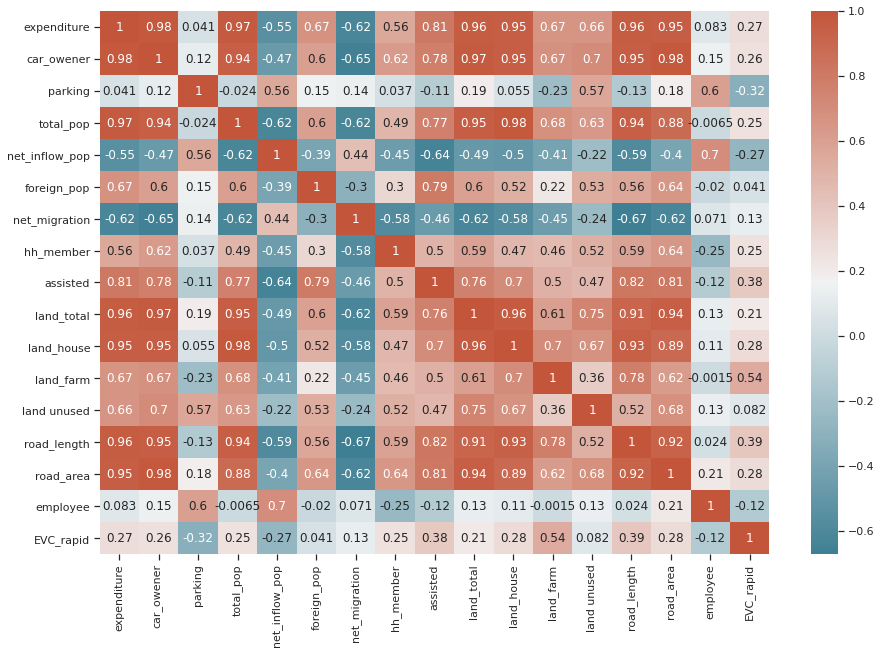

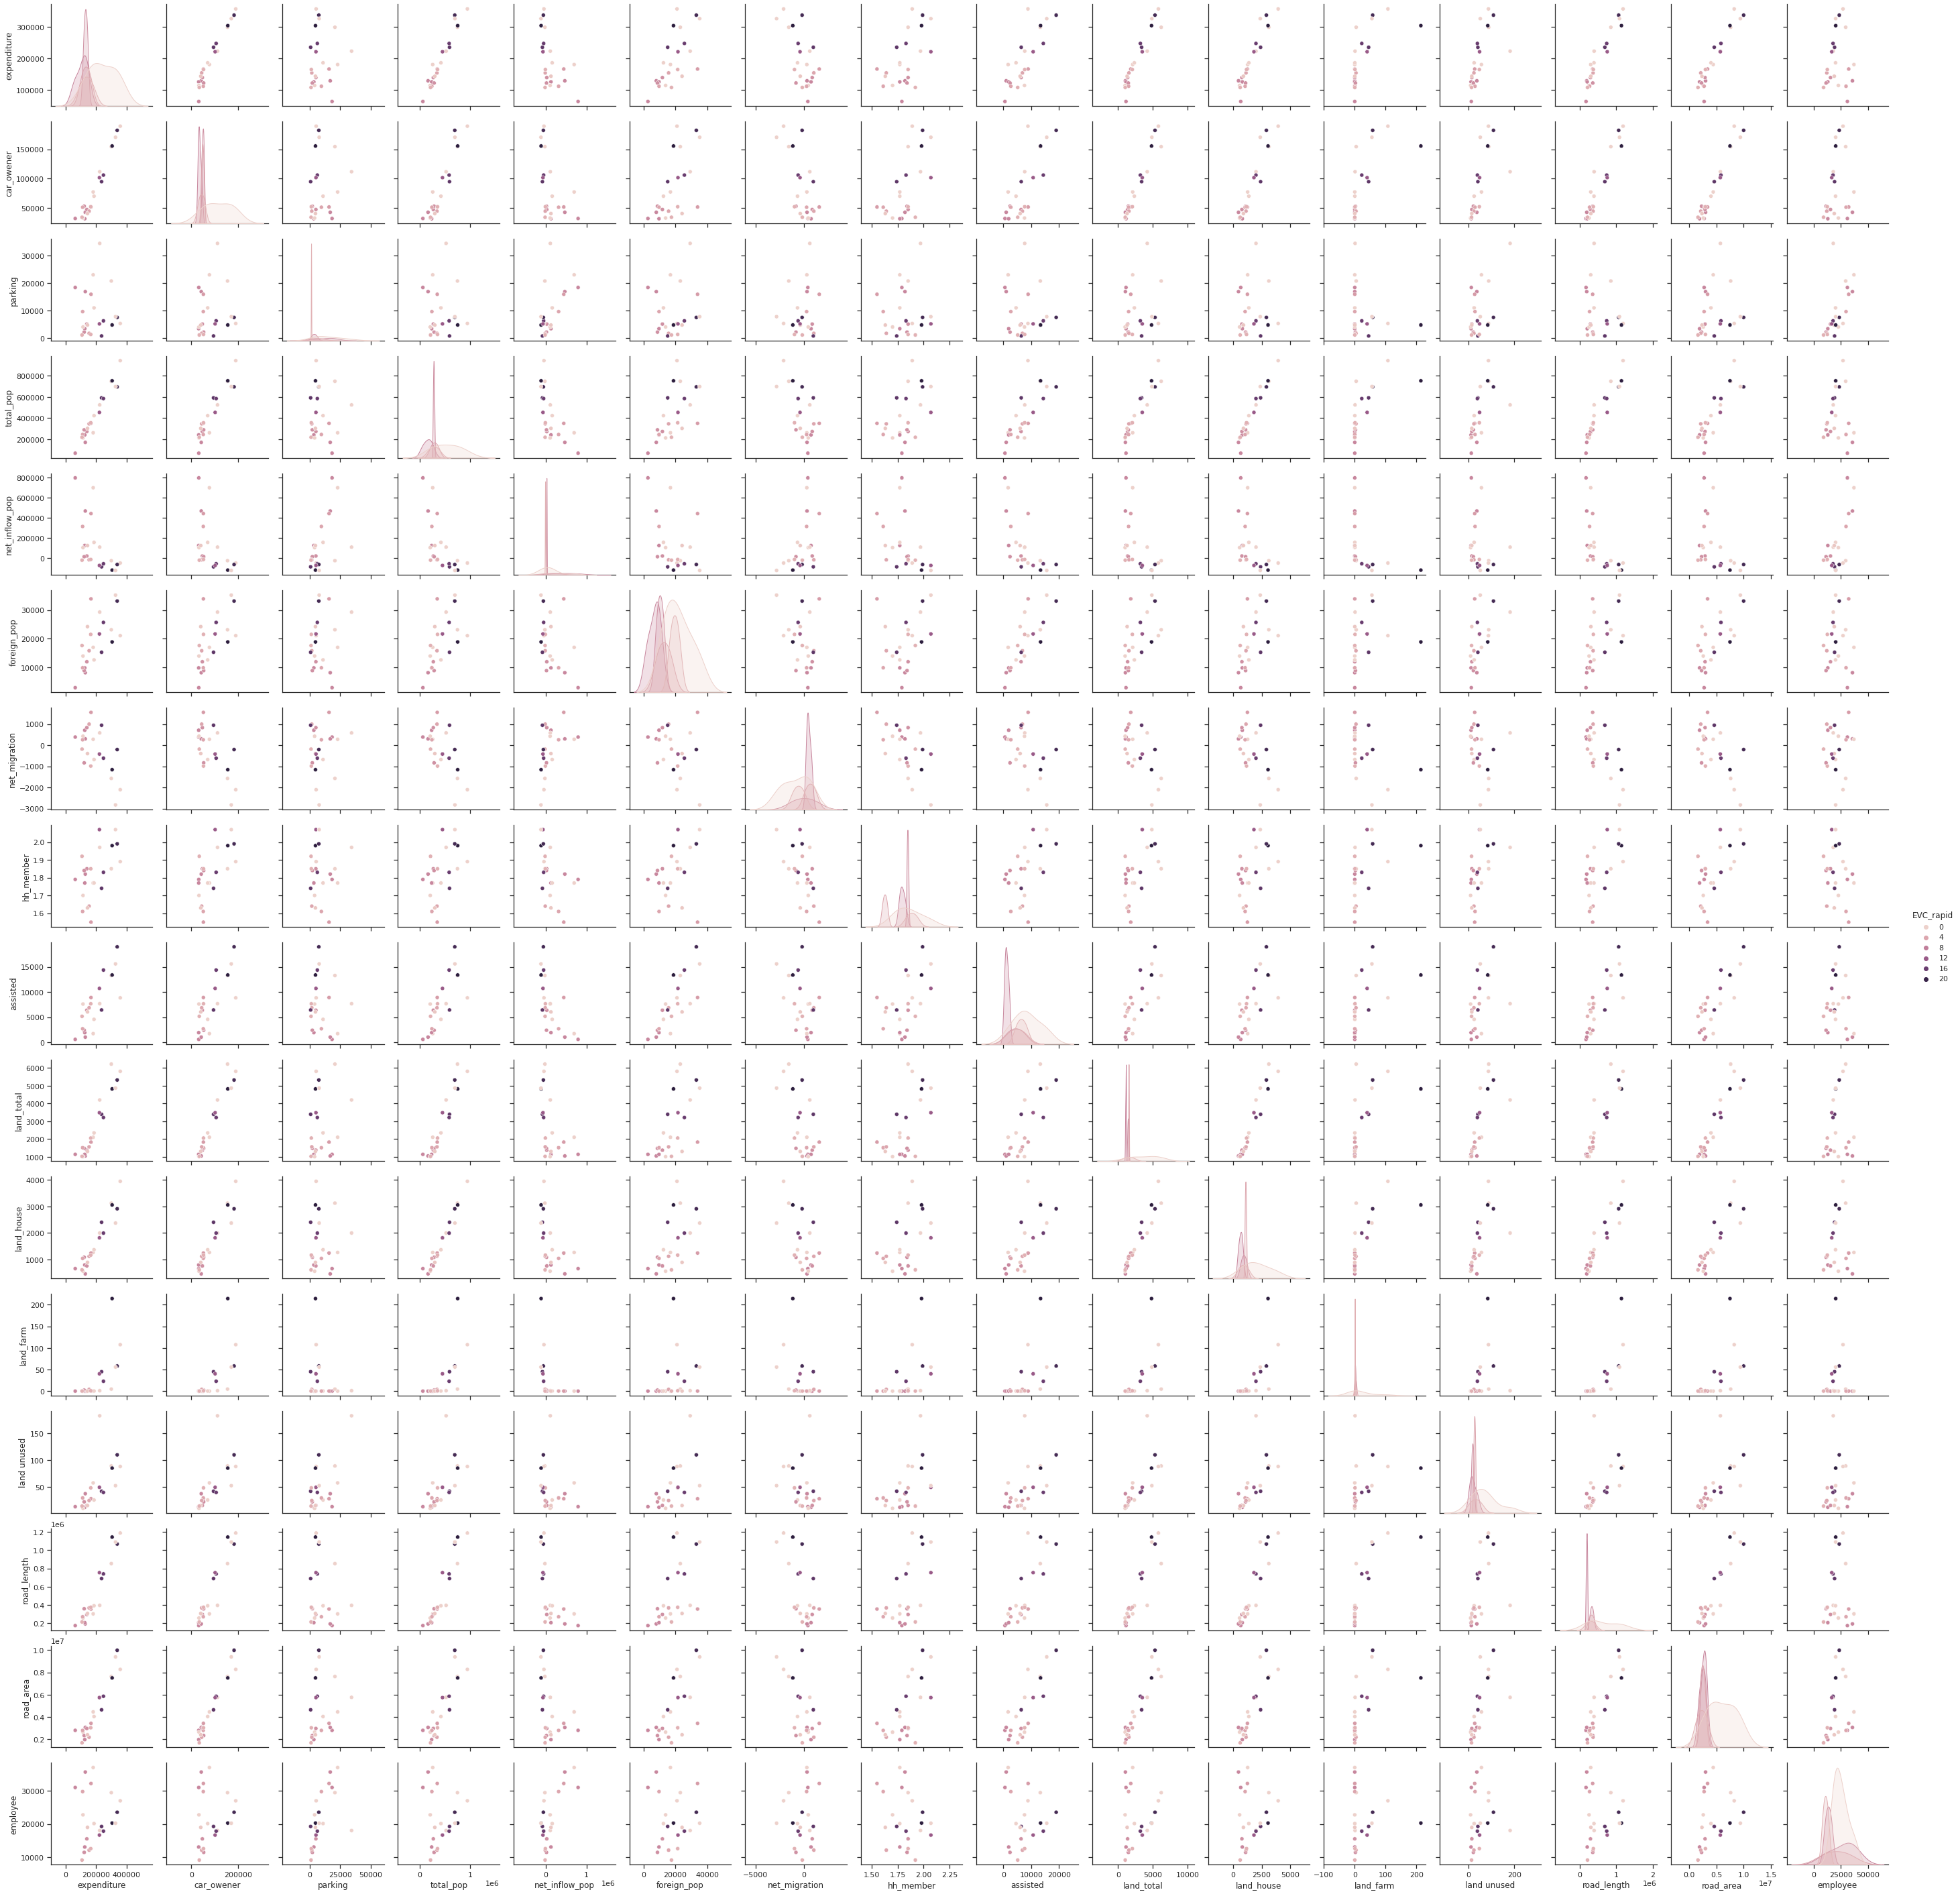

In [194]:
# Convert data type to float64 for making a correlation heatmap & a pairwise plot
dataset = dataset.replace(',', '', regex=True).astype(float)

corr = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

sns.set_theme(style="ticks")
sns.pairplot(dataset, hue = "EVC_rapid")

plt.show()

In [195]:
# Drop highly correlated variables to avoid multi-collinearity
# Since we believe road length is an essential variable, these are must-drop variables
drop_columns = ["expenditure", "car_owener", "total_pop", "assisted", "land_total", "land_house", "road_area"]
dataset_reg = dataset.drop(columns=drop_columns)

# Check the result if needed. We confirmed that residual variables are not highly correlated.
#corr = dataset_reg.corr()
#plt.subplots(figsize=(15,10))
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


In [196]:
labels = ['parking','net_inflow_pop', 'foreign_pop', 'net_migration', 'hh_member','land_farm','land_unused', 'road_length','employee']

R² of Random Forest Regressor on training set: 0.822
R² of Random Forest Regressor on test set: 0.329


<AxesSubplot:title={'center':'Feature importance'}>

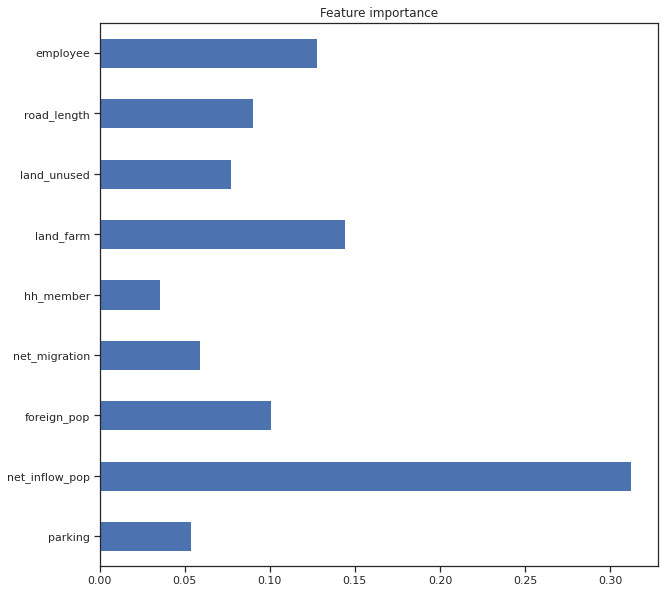

In [197]:
seed = 12

y = dataset_reg["EVC_rapid"]
X = dataset_reg.drop("EVC_rapid", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

R² of Random Forest Regressor on training set: 0.828
R² of Random Forest Regressor on test set: 0.214


<AxesSubplot:title={'center':'Feature importance'}>

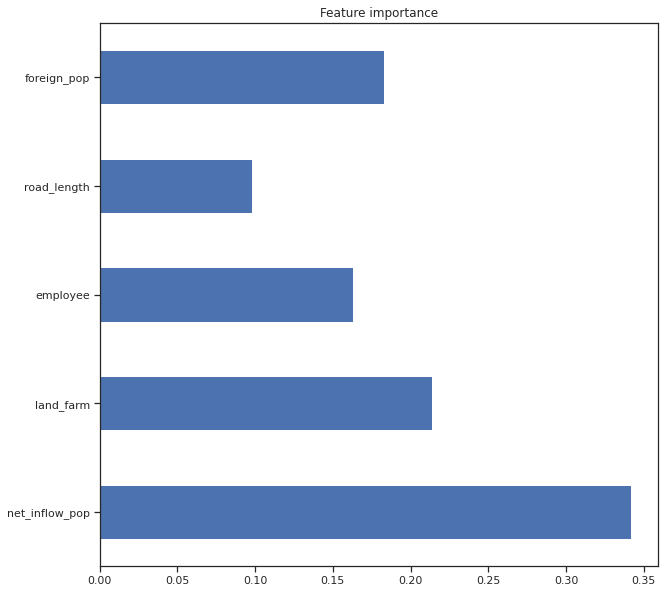

In [198]:
labels_top5 =["net_inflow_pop", "land_farm", "employee", "road_length", "foreign_pop"]

X = dataset_reg[labels_top5]
                
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels_top5)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

In [201]:
# It looks net-inflow of population is the most important while overall accuracy is low.

print(X_tokyo[['CITY_ENG', 'net_inflow_pop']].sort_values('net_inflow_pop', ascending=False))

         CITY_ENG net_inflow_pop
0      Chiyoda-ku        794,656
2       Minato-ku        697,492
1         Chuo-ku        467,419
3     Shinjuku-ku        441,988
12     Shibuya-ku        314,567
6       Sumida-ku         22,907
9       Meguro-ku         16,209
8    Shinagawa-ku        157,167
4       Bunkyo-ku        126,408
15     Toshima-ku        125,978
7         Koto-ku        110,425
5        Taito-ku        105,857
14    Suginami-ku        -84,022
21  Katsushika-ku        -70,577
20      Adachi-ku        -61,152
18    Itabashi-ku        -53,816
11    Setagaya-ku        -46,477
10         Ota-ku        -23,216
17     Arakawa-ku        -18,260
13      Nakano-ku        -14,945
22     Edogawa-ku       -119,819
19      Nerima-ku       -116,636
16        Kita-ku        -11,323


## 10. Summary of products and results (10pt)

## 11. Discussion (10pt)

## 12. Conclusions and future work (10pt)